In [ ]:
import os
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import diverse_yeast_tools as dyt

base_dir = dyt.base_dir

#from statsmodels.formula.api import ols

In [24]:
phenotype_glu_fer = pd.read_table(base_dir + os.sep + os.path.normpath('phenotype_analysis/Phenotype_Glu_Fer.tsv'))

phenotype_glu_fer.rename(columns={'Non-fermentative': 'Non_fermentative', 'Unnamed: 0':'og_ref' }, inplace=True)

col_rename = {'superpathway of glucose fermentation': 'glucose_fermentation',
              'TCA cycle, aerobic respiration': 'TCA_cycle'}

for col in ['superpathway of glucose fermentation', 'TCA cycle, aerobic respiration']:
    old_col = phenotype_glu_fer[col]
    new_col = []
    for item in old_col: 
        if item== 1:
            new_col.append(True)
        elif np.isnan(item):
            new_col.append(False)
    
    phenotype_glu_fer[col_rename[col]] = new_col


In [27]:
results = smf.ols('Fermentative ~ Non_fermentative + TCA_cycle', data = phenotype_glu_fer).fit()

In [54]:
results.params

Intercept            0.117597
TCA_cycle[T.True]    0.003618
Non_fermentative     0.912828
dtype: float64

                            OLS Regression Results                            
Dep. Variable:           Fermentative   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2467.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          4.89e-267
Time:                        16:00:15   Log-Likelihood:                 1034.2
No. Observations:                 526   AIC:                            -2062.
Df Residuals:                     523   BIC:                            -2050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

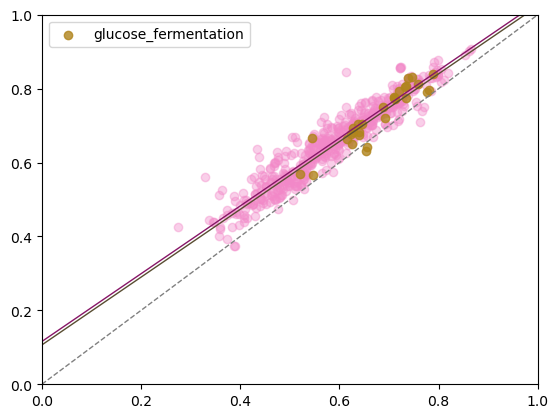

In [63]:
pathway = 'glucose_fermentation'

results = smf.ols('Fermentative ~ Non_fermentative + ' + pathway , data = phenotype_glu_fer).fit()

fig, ax = plt.subplots(1,1)

data_subset = phenotype_glu_fer[~phenotype_glu_fer[pathway]]

xmin = 0
xmax = 1

ax.scatter(data_subset['Non_fermentative'], data_subset['Fermentative'], color='#f288c8', alpha = 0.4 )

data_subset = phenotype_glu_fer[phenotype_glu_fer[pathway]]

ax.scatter(data_subset['Non_fermentative'], data_subset['Fermentative'], color='#b0841c', alpha = 0.8, label = pathway)

ax.legend()

ax.plot([xmin,xmax], [xmin,xmax],color= 'gray', linestyle='--', linewidth = 1)

b = results.params['Intercept']
m = results.params['Non_fermentative']
factor_diff = results.params[ pathway + '[T.True]']

ax.plot([xmin,xmax ], [m*xmin + b, m*xmax + b], color = '#871667', linestyle = '-', linewidth = 1)

ax.plot([xmin,xmax ], [m*xmin + b + factor_diff, m*xmax + b+ factor_diff], color = '#594d32', linestyle = '-', linewidth = 1)

ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

print(results.summary())



In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Fermentative   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2458.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          1.17e-266
Time:                        15:27:02   Log-Likelihood:                 1033.3
No. Observations:                 526   AIC:                            -2061.
Df Residuals:                     523   BIC:                            -2048.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1176      0.00

In [8]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.90e-08
Time:                        15:06:38   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [3]:
# Define the data for the ANCOVA
df = pd.DataFrame({'dependent_variable' : [8, 7, 9, 11, 10, 12, 14, 13, 15, 16],
   'group' : ["A", "A", "A", "B", "B", "B", "C", "C", "C", "C"],
    'covariate' : [20, 30, 40, 30, 40, 50, 40, 50, 60, 70]})

# Perform the ANCOVA
model = ols('dependent_variable ~ group + covariate', data=df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     dependent_variable   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     31.00
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           0.000476
Time:                        15:01:20   Log-Likelihood:                -10.724
No. Observations:                  10   AIC:                             29.45
Df Residuals:                       6   BIC:                             30.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0000      1.054      5.692      0.0

c:\Users\bheineike\anaconda3\envs\bmh_bioinformatics\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
